In [27]:
import pandas as pd
import matplotlib.pyplot as plt

CRYPTO = ['btc.csv', 'eth.csv']
TRADFI = ['spy.csv', 'qqq.csv', 'sti.csv']

In [28]:
spy = pd.read_csv('/Users/benho/Documents/mcomp/CS5344_Project/1. Data Retrieval and Processing of News and Stock Prices/us_2024_ticker combined versions/SPY_Combined_WithPriceChange.csv')
# sti = pd.read_csv('sti.csv')

## Simple Moving Average
- Equal weightage given to all prices
- 100, 200, 500 days for long term investors
- 10, 20, 50 days for short term investors

In [29]:
spy['SMA10'] = spy['Close/Last'].rolling(10).mean()
spy['SMA20'] = spy['Close/Last'].rolling(20).mean()
spy['SMA50'] = spy['Close/Last'].rolling(50).mean()
spy['SMA100'] = spy['Close/Last'].rolling(100).mean()
spy['SMA200'] = spy['Close/Last'].rolling(200).mean()
spy['SMA500'] = spy['Close/Last'].rolling(500).mean()


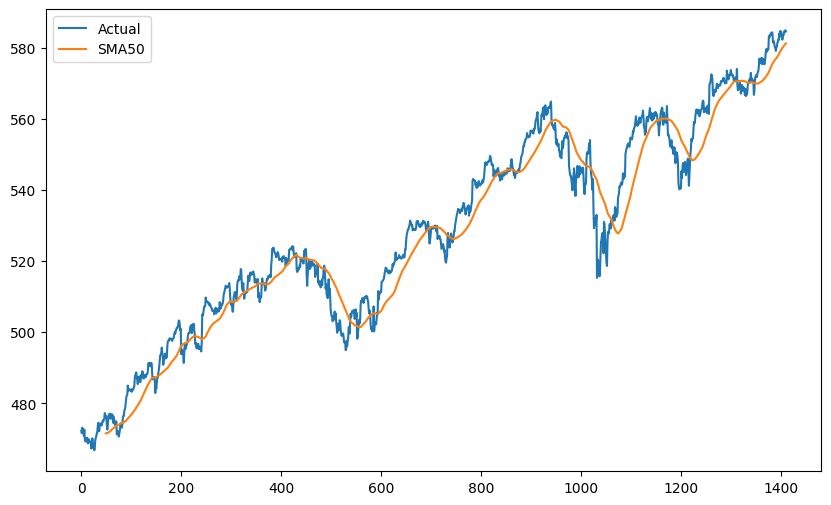

In [30]:
plt.figure(figsize=(10,6))
plt.plot(spy["Close/Last"], label="Actual")
# plt.plot(spy['SMA10'], label="SMA10")
# plt.plot(spy['SMA20'], label="SMA20")
plt.plot(spy['SMA50'], label="SMA50")
# plt.plot(spy['SMA100'], label="SMA100")
# plt.plot(spy['SMA200'], label="SMA200")
# plt.plot(spy['SMA500'], label="SMA500")
plt.legend()

## Exponential Moving Average
- Higher weightage given to recent prices
- 8 or 20 days for short term investors
- 50 and 200 days for long term investors

In [31]:
spy['EMA8'] = spy['Close/Last'].ewm(span=8, adjust=False).mean()
spy['EMA20'] = spy['Close/Last'].ewm(span=20, adjust=False).mean()
spy['EMA50'] = spy['Close/Last'].ewm(span=50, adjust=False).mean()
spy['EMA200'] = spy['Close/Last'].ewm(span=200, adjust=False).mean()

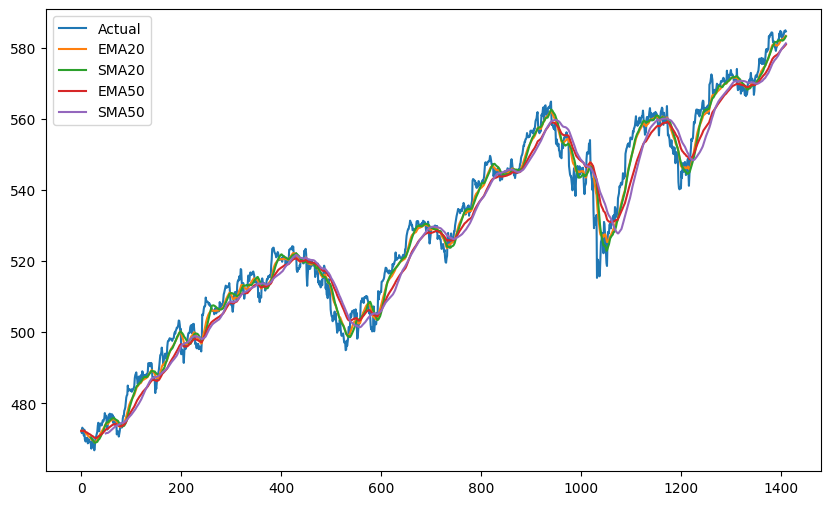

In [32]:
plt.figure(figsize=(10,6))
plt.plot(spy["Close/Last"], label="Actual")
# plt.plot(spy['EMA8'], label="EMA8")
plt.plot(spy['EMA20'], label="EMA20")
plt.plot(spy['SMA20'], label="SMA20")
plt.plot(spy['EMA50'], label="EMA50")
plt.plot(spy['SMA50'], label="SMA50")
# plt.plot(spy['EMA200'], label="EMA200")
plt.legend()

## Fast Fourier Transform
- detects cycles and patterns
- filter out noise
- cutoff frequency masks high frequencies

In [33]:
import numpy as np

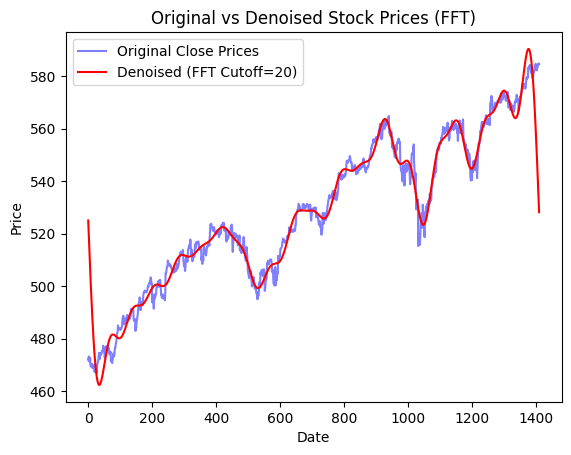

In [34]:
cutoff = 20

close_prices = spy['Close/Last'].values
fft_vals = np.fft.fft(close_prices)

# Create a mask to zero out high-frequency components
fft_freq = np.fft.fftfreq(len(close_prices))
fft_vals[np.abs(fft_freq) > cutoff / len(close_prices)] = 0

# Inverse FFT to transform back to time domain
denoised_prices = np.fft.ifft(fft_vals).real

# Insert denoised data back into the dataframe
spy['Denoised_Close'] = np.nan  # Initialize denoised column with NaN
spy.loc[spy.index, 'Denoised_Close'] = denoised_prices

# Plot original and denoised data for comparison


plt.plot(spy['Close/Last'], label='Original Close Prices', color='blue', alpha=0.5)
plt.plot(spy['Denoised_Close'], label=f'Denoised (FFT Cutoff={cutoff})', color='red')
plt.title('Original vs Denoised Stock Prices (FFT)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [35]:
spy['ema_pct_change'] = spy['EMA8'].pct_change()*100
spy['ema_pct_change'] = spy['ema_pct_change'].fillna(0)
spy.head()

,Unnamed: 0,<TICKER>,<PER>,Date,Time,<OPEN>,<HIGH>,<LOW>,Close/Last,<VOL>,...,SMA50,SMA100,SMA200,SMA500,EMA8,EMA20,EMA50,EMA200,Denoised_Close,ema_pct_change
0,0,SPY,60,240102,90000,472.160,472.79,471.37,472.27,1063758,...,NaN,NaN,NaN,NaN,472.270000,472.270000,472.270000,472.270000,525.031858,0.000000
1,1,SPY,60,240102,100000,472.275,472.70,471.31,471.64,811607,...,NaN,NaN,NaN,NaN,472.130000,472.210000,472.245294,472.263731,521.910610,-0.029644
2,2,SPY,60,240102,110000,471.670,473.29,471.64,473.17,688103,...,NaN,NaN,NaN,NaN,472.361111,472.301429,472.281557,472.272749,518.804269,0.048951
3,3,SPY,60,240102,120000,473.190,473.66,472.59,472.64,600351,...,NaN,NaN,NaN,NaN,472.423086,472.333673,472.295614,472.276403,515.721052,0.013120
4,4,SPY,60,240102,130000,472.650,472.97,472.00,472.10,543311,...,NaN,NaN,NaN,NaN,472.351289,472.311419,472.287943,472.274648,512.669040,-0.015198


In [36]:
spy.to_csv("/Users/benho/Documents/mcomp/CS5344_Project/1. Data Retrieval and Processing of News and Stock Prices/us_2024_ticker combined versions/SPY_Combined_Moving_Averages.csv")

In [37]:
spy.head()

,Unnamed: 0,<TICKER>,<PER>,Date,Time,<OPEN>,<HIGH>,<LOW>,Close/Last,<VOL>,...,SMA50,SMA100,SMA200,SMA500,EMA8,EMA20,EMA50,EMA200,Denoised_Close,ema_pct_change
0,0,SPY,60,240102,90000,472.160,472.79,471.37,472.27,1063758,...,NaN,NaN,NaN,NaN,472.270000,472.270000,472.270000,472.270000,525.031858,0.000000
1,1,SPY,60,240102,100000,472.275,472.70,471.31,471.64,811607,...,NaN,NaN,NaN,NaN,472.130000,472.210000,472.245294,472.263731,521.910610,-0.029644
2,2,SPY,60,240102,110000,471.670,473.29,471.64,473.17,688103,...,NaN,NaN,NaN,NaN,472.361111,472.301429,472.281557,472.272749,518.804269,0.048951
3,3,SPY,60,240102,120000,473.190,473.66,472.59,472.64,600351,...,NaN,NaN,NaN,NaN,472.423086,472.333673,472.295614,472.276403,515.721052,0.013120
4,4,SPY,60,240102,130000,472.650,472.97,472.00,472.10,543311,...,NaN,NaN,NaN,NaN,472.351289,472.311419,472.287943,472.274648,512.669040,-0.015198
